In [16]:
import os
import pathlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import image
plt.style.use("fivethirtyeight")
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Rescaling
from keras.layers import Dense, Flatten


print("Tensorflow Version:", tf.__version__)
print("Keras Version:", keras.__version__)


import warnings
warnings.filterwarnings("ignore")


Tensorflow Version: 2.19.0
Keras Version: 3.10.0


In [3]:
data_dir_train = pathlib.Path(r"D:\Final_project\Pneumonia Detection from Chest X-Ray Images using CNN\chest_xray\train")

data_dir_test = pathlib.Path(r"D:\Final_project\Pneumonia Detection from Chest X-Ray Images using CNN\chest_xray\test")

data_dir_val = pathlib.Path(r"D:\Final_project\Pneumonia Detection from Chest X-Ray Images using CNN\chest_xray\val")

In [4]:
# Checking the number images in all the paths defined above
print("Number of Images in Train:", len(list(data_dir_train.glob("*/*.jpeg"))))

print("Number of Images in Test:", len(list(data_dir_test.glob("*/*.jpeg"))))

print("Number of Images in Validation:", len(list(data_dir_val.glob("*/*.jpeg"))))

Number of Images in Train: 5216
Number of Images in Test: 624
Number of Images in Validation: 16


In [5]:
# Here, we are defining some variables which will be commonly used in the further codes
height = 150
width = 150
batch_size = 16
seed = 42 # For reproducibility 

In [ ]:
# Next! In this step, we are going to use the method "image_dataset_from_directory()" to construct a dataset!

# First we ask Keras to create a "training" dataset with 0.2 as validation split.

train_ds = keras.preprocessing.image_dataset_from_directory(
data_dir_train,
seed = seed,
validation_split = 0.2,
subset = "training",
image_size = (height,width),
batch_size = batch_size)

Found 5216 files belonging to 2 classes.
Using 4173 files for training.


In [7]:
# Second we ask Keras to create a "validation" dataset with 0.2 as validation split.


val_ds = keras.preprocessing.image_dataset_from_directory(
data_dir_train,
seed = seed,
validation_split = 0.2,
subset = "validation",
image_size = (height,width),
batch_size = batch_size)

Found 5216 files belonging to 2 classes.
Using 1043 files for validation.


In [8]:
# Finally we are storing all the available class names from the dataset. (NORMAL and PNEUMONIA)

# This also ensures, we have created the dataset successfully!

class_names = train_ds.class_names
class_names

['NORMAL', 'PNEUMONIA']

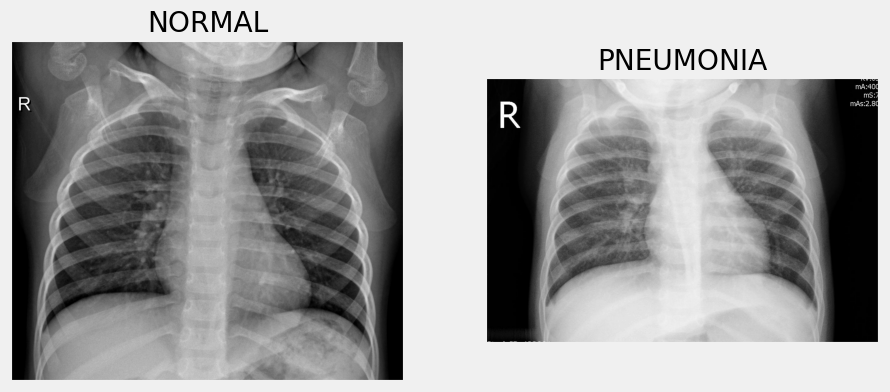

In [10]:
# Defining the Canvas size
plt.figure(figsize=[10,8])

# Next we are just picking one image from the unique categories and displaying them:
for index, classes in enumerate(class_names):
    for images in train_ds.file_paths:
        if classes in images:
            img = image.imread(images)
            plt.subplot(1,2,index+1)
            plt.imshow(img, cmap=plt.cm.gist_gray)
            plt.xticks([])
            plt.yticks([])
            plt.title(str(classes))
            break
plt.show()

In [ ]:
# Here we start building our model in Keras:

model = Sequential(
        [Rescaling(1./255, input_shape=(height, width, 3)),
        layers.Conv2D(16, 3, padding= "same", activation = "relu"),
        layers.MaxPooling2D(),
        layers.Conv2D(32, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(64, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(128, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Dropout(0.2),
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dense(2)]
        )

In [18]:
# Next we compile this model where we define the optimizer, loss function and the metric which we will use to evaluate.
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# Here we will use visualkeras to visualize the CNN Model that we created

# First step: Install Visual Keras
!pip install visualkeras

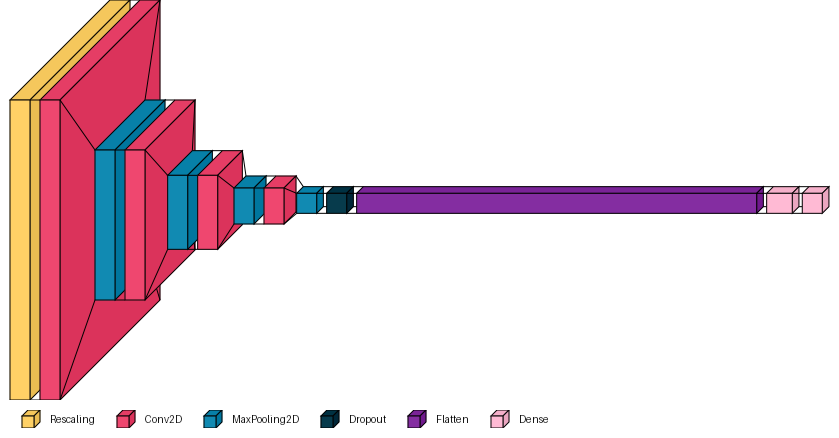

In [20]:
# Visualizing our model (Hidden Input)
import visualkeras
visualkeras.layered_view(model, scale_xy=2, legend=True)

In [21]:
# Finally we are going to train our model for 20 epochs
history = model.fit(train_ds, validation_data=val_ds, epochs=20)

Epoch 1/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 93s 347ms/step - accuracy: 0.8451 - loss: 0.3281 - val_accuracy: 0.9569 - val_loss: 0.1138
Epoch 2/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 50s 193ms/step - accuracy: 0.9605 - loss: 0.1063 - val_accuracy: 0.9616 - val_loss: 0.1041
Epoch 3/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 49s 187ms/step - accuracy: 0.9698 - loss: 0.0796 - val_accuracy: 0.9597 - val_loss: 0.1051
Epoch 4/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 48s 185ms/step - accuracy: 0.9769 - loss: 0.0595 - val_accuracy: 0.9684 - val_loss: 0.0888
Epoch 5/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 49s 187ms/step - accuracy: 0.9781 - loss: 0.0532 - val_accuracy: 0.9626 - val_loss: 0.1142
Epoch 6/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 49s 188ms/step - accuracy: 0.9808 - loss: 0.0465 - val_accuracy: 0.9722 - val_loss: 0.0880
Epoch 7/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 51s 195ms/step - accuracy: 0.9876 - loss: 0.0324 - val_accuracy: 0.9760 - val_loss: 0.0858
Epoch 8/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 85s 325ms/step - accuracy: 0.9914 - loss: 0

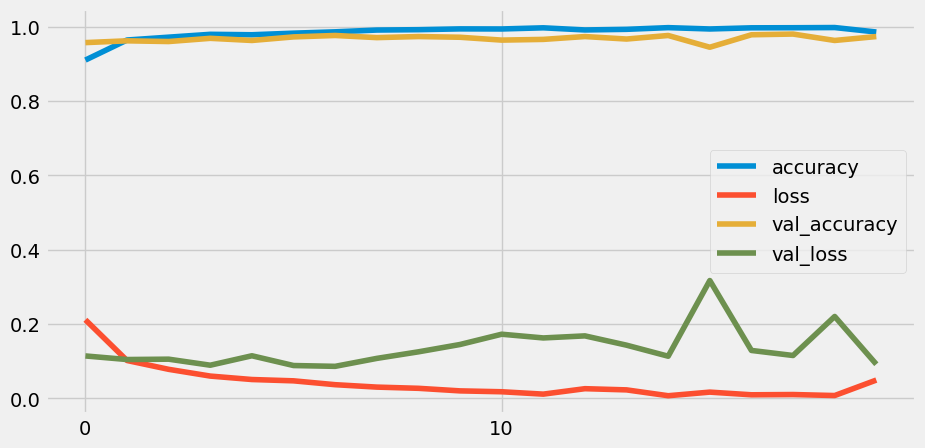

In [22]:
# Next we are going to plot a graph to check the loss and accuracy as the model trained for 20 epochs for both train and validation.
pd.DataFrame(history.history).plot(figsize=[10,5])
plt.yticks(np.linspace(0,1,6))
plt.xticks(np.linspace(0,10,2))
plt.show()

In [23]:
# To evaluate our model, we are going to make use of the "test" dataset
test_ds = keras.preprocessing.image_dataset_from_directory(
data_dir_test,
seed=seed,
image_size=(height,width),
batch_size=batch_size)

Found 624 files belonging to 2 classes.


In [29]:
model.evaluate(test_ds, batch_size=batch_size)

39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - accuracy: 0.7512 - loss: 3.0135


[3.3560919761657715, 0.7355769276618958]

In [30]:
# The Next step is to save the model. This is our trained model. We saved it so that we do not need to train it again and again.

# I am saving this in the .h5 format.

model.save("./xray_model.h5")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


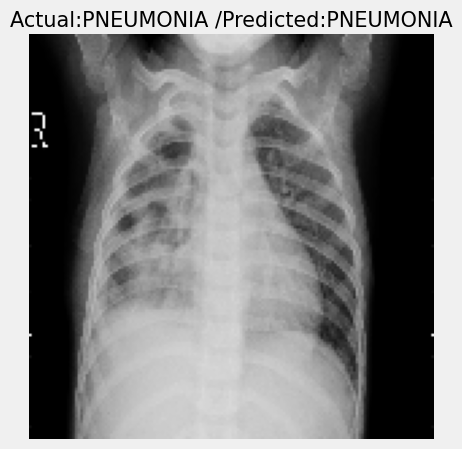

In [38]:
# Loading the .h5 model that we had saved in the previous step:
my_xray_cnnmodel = keras.models.load_model("./xray_model.h5")

# Defining an image path from the "pred" folder:
# image_path = r"D:\Final_project\Pneumonia Detection from Chest X-Ray Images using CNN\Prediction\NORMAL\NORMAL2-IM-1437-0001.jpeg"
# image_path = r"D:\Final_project\Pneumonia Detection from Chest X-Ray Images using CNN\Prediction\NORMAL\NORMAL2-IM-1440-0001.jpeg"
# image_path = r"D:\Final_project\Pneumonia Detection from Chest X-Ray Images using CNN\Prediction\PNEUMONIA\person1947_bacteria_4876.jpeg"
image_path = r"D:\Final_project\Pneumonia Detection from Chest X-Ray Images using CNN\Prediction\PNEUMONIA\person1954_bacteria_4886.jpeg"


# Preprocessing the image to 150x150x3 size and predicting the label:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(150,150,3))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])
predictions = my_xray_cnnmodel.predict(input_arr)

classes = ['NORMAL', 'PNEUMONIA']

actual = ''

for class_name in classes:
    if class_name in image_path:
        actual = class_name

pred = classes[np.argmax(predictions, axis=1)[0]]

# Finally we are displaying the predicted outcome:
plt.figure(figsize=[8,5])
plt.imshow(image, cmap='gray')
plt.title("Actual:"+actual+" /Predicted:"+pred, size=15)
plt.axis('off')
plt.show()